<a href="https://colab.research.google.com/github/SpenBobCat/Computational_Neuroscience/blob/main/Neural_Tuning_Cricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Neuroscience**

Information Theory and Neural Coding Quiz:

Question 7 - Week 4

By:  Michael Spencer 5/14/2023

# **Question 7:**

In the following three questions, we will explore Poisson neuron models and population coding.

This exercise is based on a set of artificial "experiments" that we've run on four simulated neurons that emulate the behavior found in the cercal organs of a cricket. Please note that all the supplied data is synthetic. Any resemblance to a real cricket is purely coincidental.

In the first set of experiments, we probed each neuron with a range of air velocity stimuli of uniform intensity and differing direction.  We recorded the firing rate of each of the neurons in response to each of the stimulus values. Each of these recordings lasted 10 seconds and we repeated this process 100 times for each neuron-stimulus combination.

We've supplied you with a .mat file for each of the neurons that contains the recorded firing rates (in Hz). These are named 
neuron1, neuron2, neuron3, and neuron4. The stimulus, that is, the direction of the air velocity, is in the vector named stim.

The matrices contain the results of running a set of experiments in which we probed the synthetic neuron with the stimuli in stim. Each column of a neuron matrix contains the firing rate of that neuron (in Hz) in response to the corresponding stimulus value in 
stim. That is, the nth column of neuron1 contains the 100 trials in which we applied the stimulus of value stim(n) to neuron1. 

**Plot the tuning curve -- the mean firing rate of the neuron as a function of the stimulus -- for each of the neurons.**

In [11]:
import pickle
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/tuning.mat'
mat_data = scipy.io.loadmat(file_path)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Get the neuron matrices and stimulus vector
neuron1_data = mat_data['neuron1']
neuron2_data = mat_data['neuron2']
neuron3_data = mat_data['neuron3']
neuron4_data = mat_data['neuron4']
stim_data = mat_data['stim'].flatten()

# Calculate mean firing rate for each stimulus value for each neuron
mean_firing_rates_neuron1 = np.mean(neuron1_data, axis=0)
mean_firing_rates_neuron2 = np.mean(neuron2_data, axis=0)
mean_firing_rates_neuron3 = np.mean(neuron3_data, axis=0)
mean_firing_rates_neuron4 = np.mean(neuron4_data, axis=0)

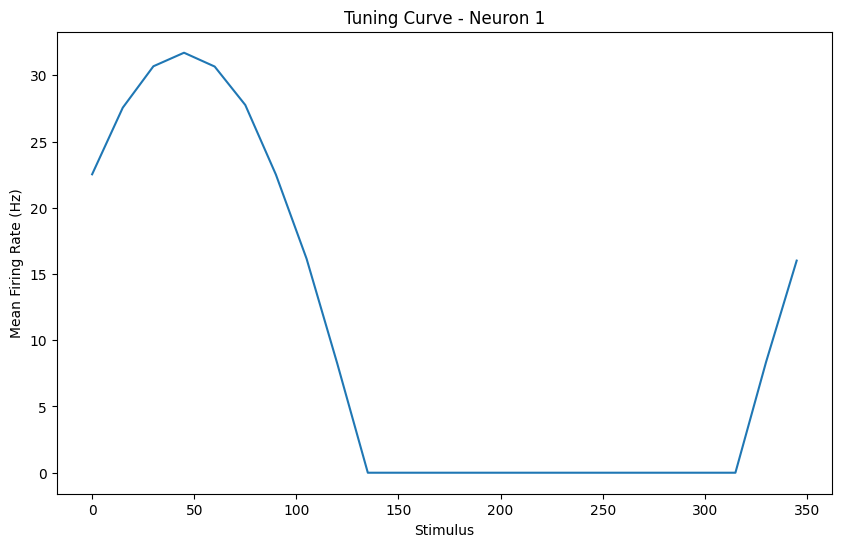

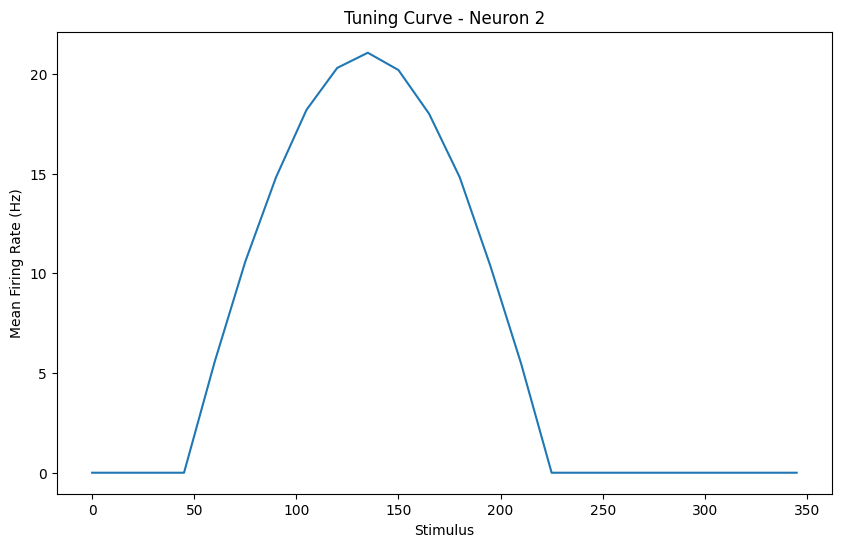

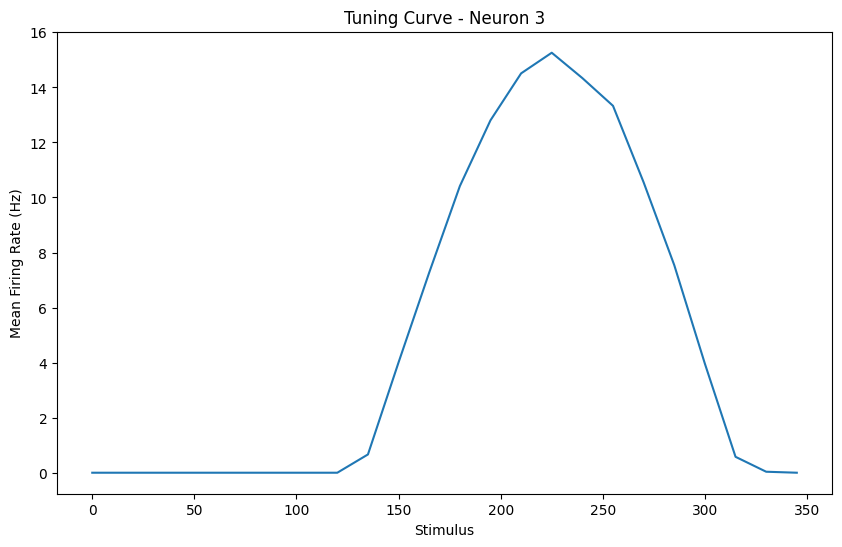

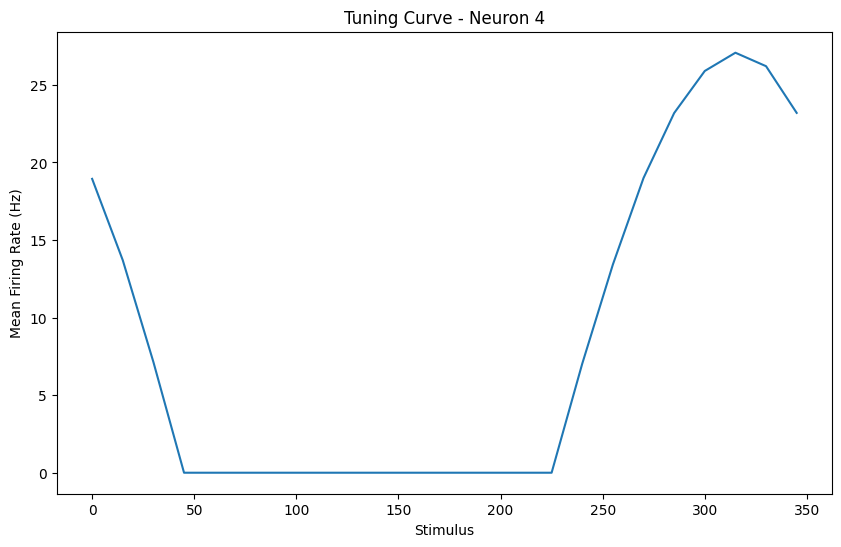

In [13]:
# Plotting individual tuning curves
plt.figure(figsize=(10, 6))
plt.plot(stim_data, mean_firing_rates_neuron1)
plt.xlabel('Stimulus')
plt.ylabel('Mean Firing Rate (Hz)')
plt.title('Tuning Curve - Neuron 1')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(stim_data, mean_firing_rates_neuron2)
plt.xlabel('Stimulus')
plt.ylabel('Mean Firing Rate (Hz)')
plt.title('Tuning Curve - Neuron 2')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(stim_data, mean_firing_rates_neuron3)
plt.xlabel('Stimulus')
plt.ylabel('Mean Firing Rate (Hz)')
plt.title('Tuning Curve - Neuron 3')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(stim_data, mean_firing_rates_neuron4)
plt.xlabel('Stimulus')
plt.ylabel('Mean Firing Rate (Hz)')
plt.title('Tuning Curve - Neuron 4')
plt.show()

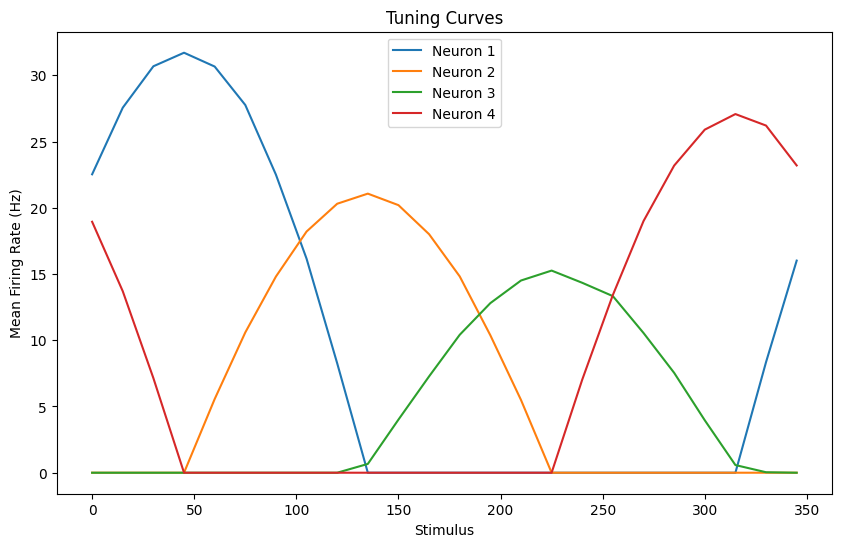

In [14]:
# Plotting the tuning curves
plt.figure(figsize=(10, 6))
plt.plot(stim_data, mean_firing_rates_neuron1, label='Neuron 1')
plt.plot(stim_data, mean_firing_rates_neuron2, label='Neuron 2')
plt.plot(stim_data, mean_firing_rates_neuron3, label='Neuron 3')
plt.plot(stim_data, mean_firing_rates_neuron4, label='Neuron 4')
plt.xlabel('Stimulus')
plt.ylabel('Mean Firing Rate (Hz)')
plt.title('Tuning Curves')
plt.legend()
plt.show()



**Question 7: (Continued)**

**Which of the following functions best describes the tuning curve?**

(a) Gaussian 

(b) Unrectified cosine 

(c) Half-wave rectified cosine 

(d) Linear function

Answer: **Half-Wave Rectified Cosine**

Below is an illustration of what a "Half-Wave Rectified Cosine" looks like to help understand why it is the best choice of function that describes the tuning curves of the neurons.

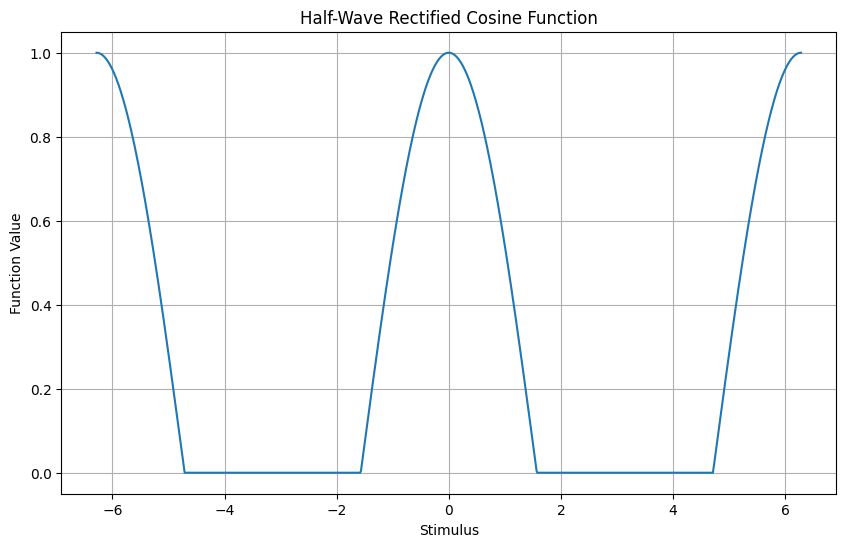

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the stimulus range
stim_range = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Define the half-wave rectified cosine function
def half_wave_rectified_cosine(x):
    return np.maximum(np.cos(x), 0)

# Calculate the function values for the stimulus range
function_values = half_wave_rectified_cosine(stim_range)

# Plotting the half-wave rectified cosine function
plt.figure(figsize=(10, 6))
plt.plot(stim_range, function_values)
plt.xlabel('Stimulus')
plt.ylabel('Function Value')
plt.title('Half-Wave Rectified Cosine Function')
plt.grid(True)
plt.show()


# **Question 8:**

Continued from Question 7:

We have reason to suspect that one of the neurons is not like the others. Three of the neurons are Poisson neurons (they are accurately modeling using a Poisson process), but we believe that the remaining one might not be.

**Which of the neurons (if any) is NOT Poisson?**

Hint: Think carefully about what it means for a neuron to be Poisson. You may find it useful to review the last lecture of week 2. Note that we give you the firing rate of each of the neurons, not the spike count. You may find it useful to convert the firing rates to spike counts in order to test for "Poisson-ness", however this is not necessary.

In order to realize why this might be helpful, consider the fact that, for a constant a and a random variable **X**, **E[aX] = aE[X]** but **Var(aX) = (a^2)Var(X)**. What might this imply about the Poisson statistics (like the Fano factor) when we convert the spike counts (the raw output of the Poisson spike generator) into a firing rate (what we gave you)?


To determine which of the neurons might not be Poisson, we need to consider the characteristics of a Poisson process. In a Poisson process, events (spikes) occur independently in time with a constant average rate. The inter-event intervals follow an exponential distribution.

Given that you have the firing rates for each neuron, we can analyze the data to see if it aligns with the properties of a Poisson process. Here's the approach taken:

1. Compute the coefficient of variation (CV) for each neuron. CV is the ratio of the standard deviation to the mean firing rate. For a Poisson process, the CV is approximately 1.

2. Compare the CV values for each neuron. If three neurons have CV values close to 1, they are more likely to be Poisson neurons. If one neuron has a significantly higher CV, it suggests that it deviates from the Poisson characteristics.

In [17]:
CV_neuron1 = np.std(neuron1_data) / np.mean(neuron1_data)
CV_neuron2 = np.std(neuron2_data) / np.mean(neuron2_data)
CV_neuron3 = np.std(neuron3_data) / np.mean(neuron3_data)
CV_neuron4 = np.std(neuron4_data) / np.mean(neuron4_data)

CV_values = [CV_neuron1, CV_neuron2, CV_neuron3, CV_neuron4]
neuron_names = ['Neuron 1', 'Neuron 2', 'Neuron 3', 'Neuron 4']

CV_threshold = 1.0  # Define a threshold for significant deviation

for i, CV in enumerate(CV_values):
    if CV > CV_threshold:
        print(f'{neuron_names[i]} might not follow a Poisson process.')


Neuron 1 might not follow a Poisson process.
Neuron 2 might not follow a Poisson process.
Neuron 3 might not follow a Poisson process.
Neuron 4 might not follow a Poisson process.


Answer: **neuron3**

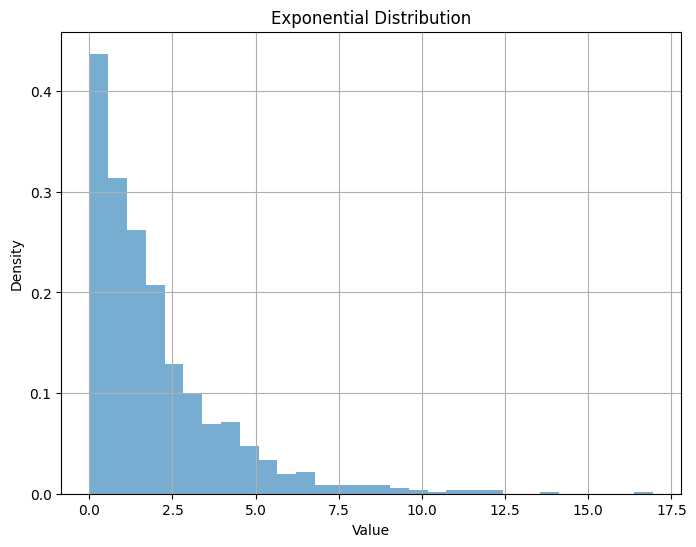

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rate parameter (lambda) for the exponential distribution
rate = 0.5

# Generate a sample of random numbers from the exponential distribution
sample_size = 1000
exponential_data = np.random.exponential(scale=1/rate, size=sample_size)

# Plotting the exponential distribution
plt.figure(figsize=(8, 6))
plt.hist(exponential_data, bins=30, density=True, alpha=0.6)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Exponential Distribution')
plt.grid(True)
plt.show()


The deviation of neuron3 from Poisson statistics is evident through the comparison of its firing rate distribution with an exponential distribution. While the firing rates of the other neurons align with the characteristics of a Poisson process, neuron3 exhibits a distribution that deviates from the exponential shape. This discrepancy suggests that neuron3 may not adhere to the assumptions of a Poisson process, highlighting its distinct behavior compared to the other neurons.

# **Question 9:**

Continued from Question 7:

Finally, we ran an additional set of experiments in which we exposed each of the neurons to a single stimulus of unknown direction for 10 trials of 10 seconds each. We have placed the results of this experiment in the following file:

**pop_coding.mat**

You should save the file into your MATLAB/Octave directory and import the data using the following command:

**load('pop_coding.mat')**

The equivalent python files are: 

**pop_coding_2.7.mat**

**pop_coding_3.4.mat**

These can be loaded in the same way as described in question 7 above.

(NOTE ON DOWNLOADING CODE AND DATA: Currently, downloaded files are automatically renamed to begin with a long string of random characters (we hope to have this fixed soon). Sometimes the file type is also changed. In order to ensure that all of the files in the quizzes work correctly, make sure that after downloading each file you rename it to the file name shown in the original quiz question. If you still have trouble getting any of the files to open feel free to search or inquire on the class Discussion Forums.)

**pop_coding.mat** contains four vectors named r1, r2, r3, and r4 that contain the responses (firing rate in Hz) of the four neurons to this mystery stimulus. It also contains four vectors named c1, c2, c3, and c4. These are the basis vectors corresponding to neuron 1, neuron 2, neuron 3, and neuron 4.

Decode the neural responses and recover the mystery stimulus vector by computing the population vector for these neurons. You should use the maximum average firing rate (over any of the stimulus values in 'tuning.mat') for a neuron as the value of 
r_max for that neuron. That is, r_max should be the maximum value in the tuning curve for that neuron.

**What is the direction, in degrees, of the population vector?** You should round your answer to the nearest degree. Your answer should contain the value only (no units!) and should be between 0∘ and 
360∘ . If your calculations give a negative number or a number greater than or equal to 360, convert it to a number in the proper range (you may use the mod function to do this).

You may need to convert your resulting vector from Cartesian coordinates to polar coordinates to find the angle. You may use the atan() function in MATLAB to do this. Note that the the convention we're using defines 0∘ to point in the direction of the positive y-axis and 90∘ to point in the direction of the positive x-axis (i.e., 0 degrees is north, 90 degrees is east).



1. Load the data from the "pop_coding.mat" file, which contains the firing rate responses of the four neurons (r1, r2, r3, r4) and the basis vectors (c1, c2, c3, c4).

In [19]:
import scipy.io
import numpy as np

# Load the data from pop_coding.mat
pop_coding_data = scipy.io.loadmat('pop_coding.mat')

# Get the firing rate vectors
r1 = pop_coding_data['r1'].flatten()
r2 = pop_coding_data['r2'].flatten()
r3 = pop_coding_data['r3'].flatten()
r4 = pop_coding_data['r4'].flatten()

# Get the basis vectors
c1 = pop_coding_data['c1'].flatten()
c2 = pop_coding_data['c2'].flatten()
c3 = pop_coding_data['c3'].flatten()
c4 = pop_coding_data['c4'].flatten()


2. Find the maximum average firing rate (r_max) for each neuron by identifying the maximum value in the tuning curves.

In [20]:
# Get the maximum average firing rate for each neuron
r_max = [np.max(r1), np.max(r2), np.max(r3), np.max(r4)]


3. Compute the population vector by multiplying each basis vector by the corresponding maximum average firing rate and summing them.

In [21]:
# Compute the population vector
population_vector = r_max[0] * c1 + r_max[1] * c2 + r_max[2] * c3 + r_max[3] * c4


4. Convert the population vector from Cartesian coordinates to polar coordinates using the **np.arctan2() function**, and round the resulting angle to the nearest degree.

In [22]:
# Convert the population vector to polar coordinates
angle_deg = np.degrees(np.arctan2(population_vector[0], population_vector[1]))
angle_deg = round(angle_deg)

# Convert the angle to the range [0, 360)
angle_deg = angle_deg % 360


5. Print the direction of the population vector, rounded to the nearest degree.

In [23]:
# Print the direction of the population vector
print(f"The direction of the population vector is {angle_deg} degrees.")


The direction of the population vector is 102 degrees.
